## Classification Problem

As a data scientist intern, I have been tasked to build a model that can predict whether a loan will be approved given collection of data from past applicants that were either approved for a loan or not. 
This model will take in the different features provided and use that to make the prediction of the loan status (either Yes or No)

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("loan_application.csv")

In [3]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
df['Dependents'].unique()

array(['0', '1', '2', '3+', nan], dtype=object)

In [5]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

### Exploratory Data Analysis

<function matplotlib.pyplot.show(close=None, block=None)>

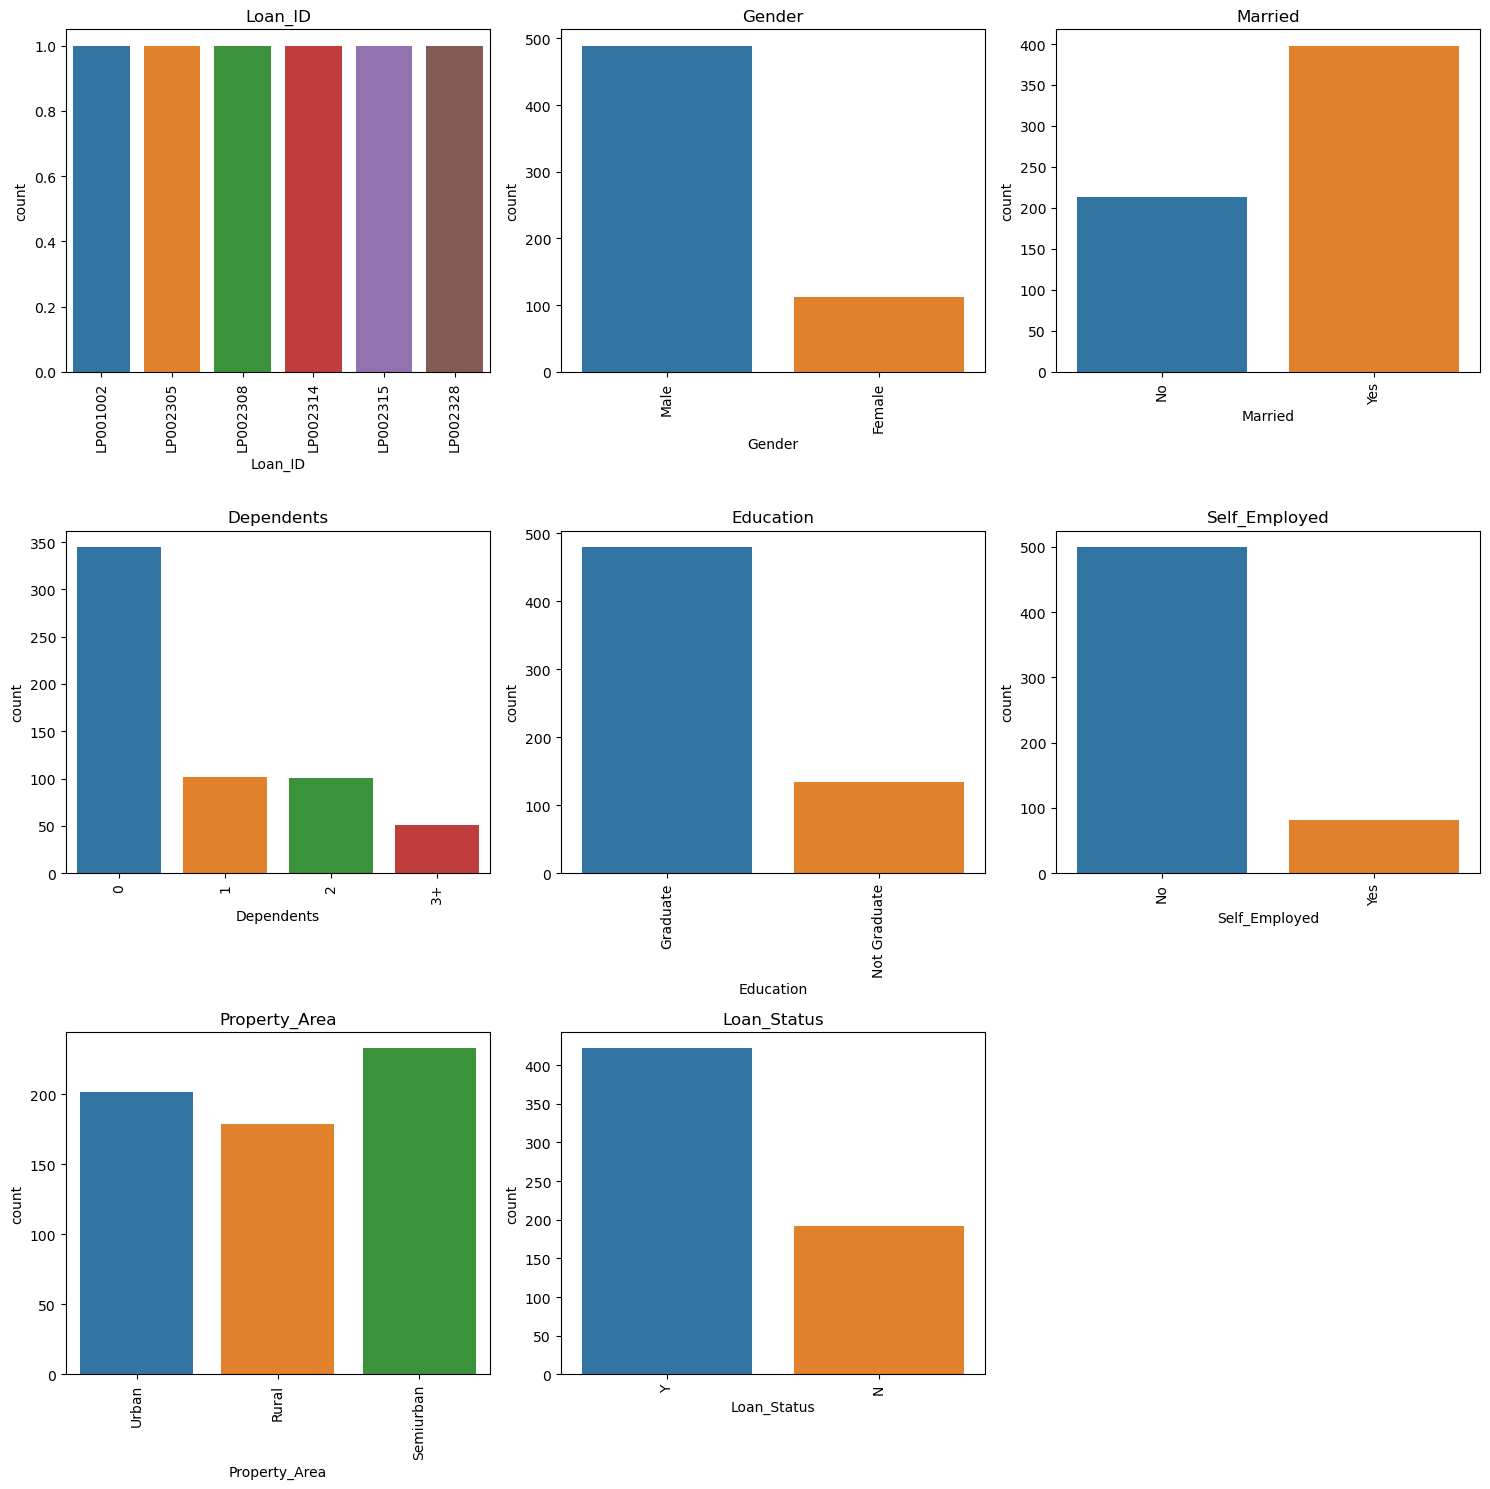

In [6]:
#Get the names of all columns with data type 'object' (Categorical columns)

cat_vars = df.select_dtypes(include = 'object').columns.tolist()


#create a figure with subplots
num_cols = len(cat_vars)
num_rows = (num_cols + 2) // 3
fig, axs = plt.subplots(nrows = num_rows, ncols = 3, figsize = (15, 5*num_rows)) #read on subplots
axs = axs.flatten()

#create a countplot for the top 6 values of each categorical variable using Seaborn

for i, var in enumerate (cat_vars):
    top_values = df[var]. value_counts().nlargest(6).index
    filtered_df = df[df[var].isin(top_values)]
    sns.countplot(x = var, data = filtered_df, ax = axs[i])
    axs[i].set_title(var)
    axs[i].tick_params(axis = 'x', rotation = 90)
    
    
#remove any extra empty subplots if needed
if num_cols < len(axs):
    for i in range(num_cols, len(axs)):
        fig.delaxes(axs[i])
        
        
#adjust pacing between subplots
fig.tight_layout()


#show plot
plt.show


<function matplotlib.pyplot.show(close=None, block=None)>

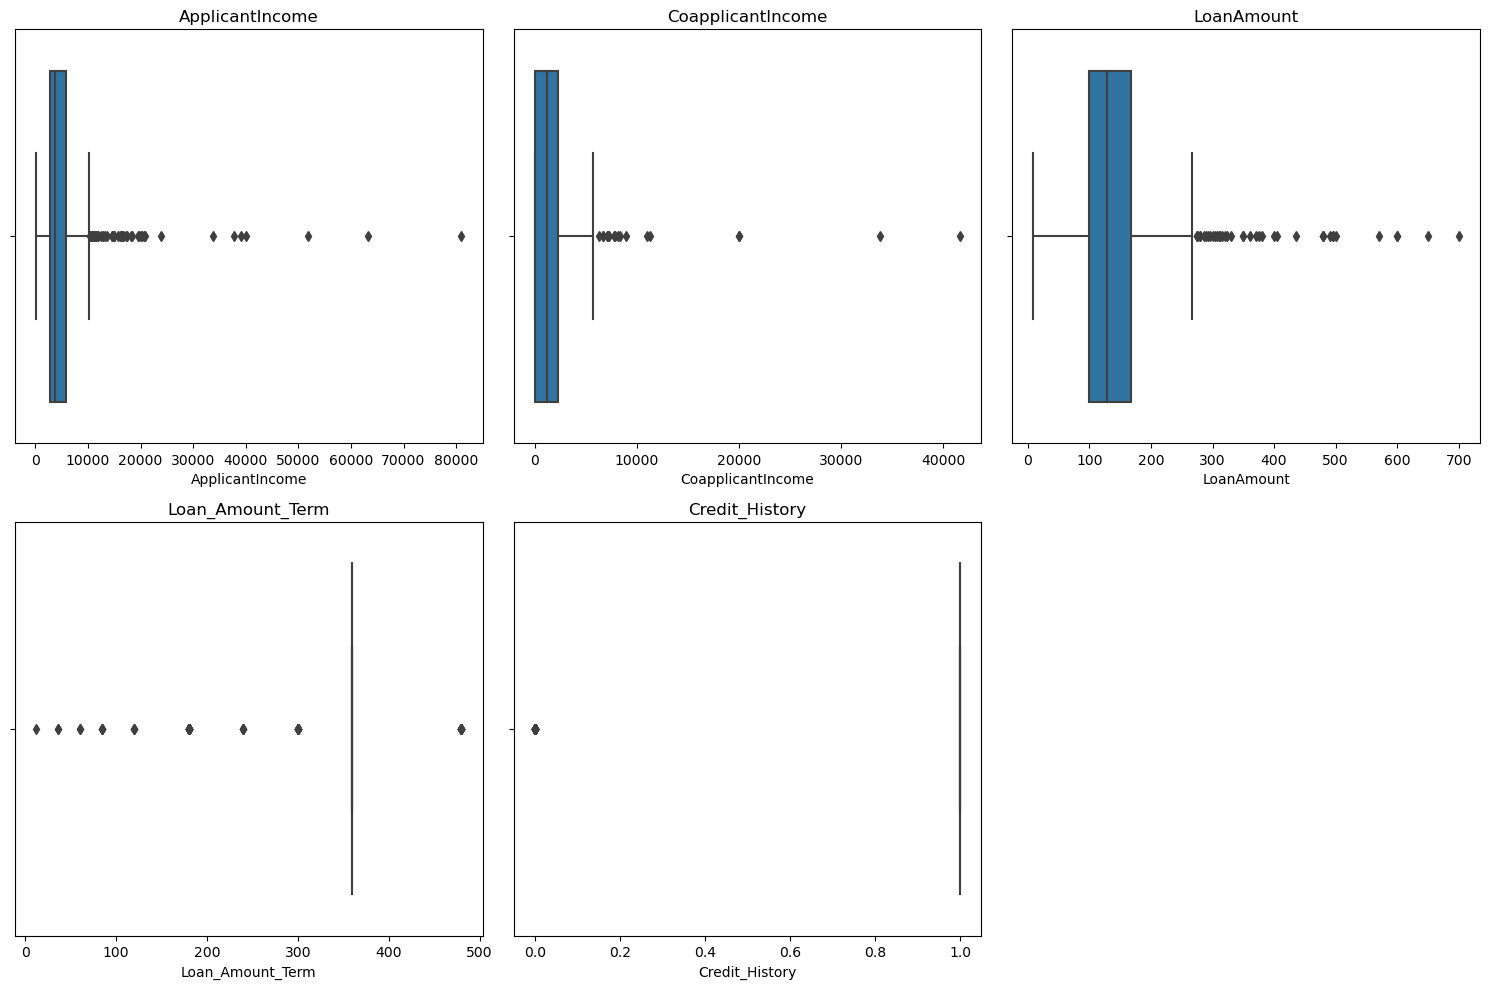

In [7]:
#Get the names of all columns with data type 'object' (number columns)

num_vars = df.select_dtypes(include = ['int','float']).columns.tolist()


#create a figure with subplots
num_cols = len(num_vars)
num_rows = (num_cols + 2) // 3
fig, axs = plt.subplots(nrows = num_rows, ncols = 3, figsize = (15, 5*num_rows)) #read on subplots
axs = axs.flatten()

#create a boxplot for each numerical variable

for i, var in enumerate (num_vars):
    sns.boxplot(x= df[var], ax=axs[i])
    axs[i].set_title(var)
    
    
#remove any extra empty subplots if needed
if num_cols < len(axs):
    for i in range(num_cols, len(axs)):
        fig.delaxes(axs[i])
        
        
#adjust pacing between subplots
fig.tight_layout()


#show plot
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

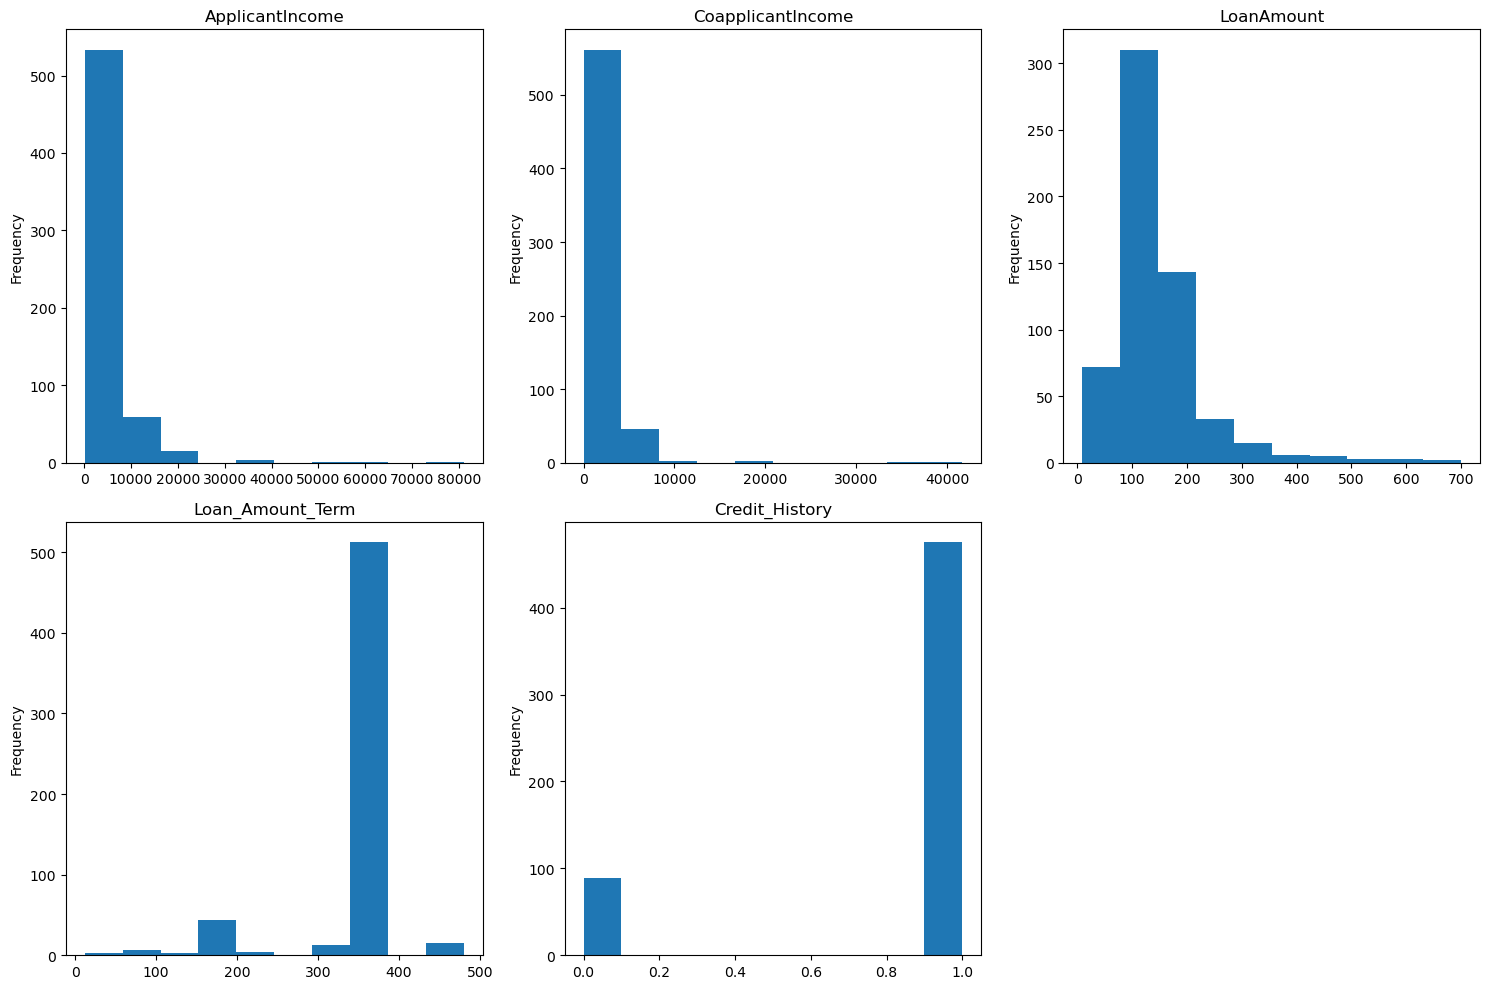

In [8]:
#this shows distribution and skewness

#Get the names of all columns with data type 'object' (number columns)

num_vars = df.select_dtypes(include = ['int','float']).columns.tolist()


#create a figure with subplots
num_cols = len(num_vars)
num_rows = (num_cols + 2) // 3
fig, axs = plt.subplots(nrows = num_rows, ncols = 3, figsize = (15, 5*num_rows)) #read on subplots
axs = axs.flatten()

#create a boxplot for each numerical variable

for i, var in enumerate (num_vars):
    df[var].plot.hist(ax = axs[i])
    axs[i].set_title(var)
    
    
#remove any extra empty subplots if needed
if num_cols < len(axs):
    for i in range(num_cols, len(axs)):
        fig.delaxes(axs[i])
        
        
#adjust pacing between subplots
fig.tight_layout()


#show plot
plt.show

## Data Preprocessing

In [9]:
#high dimensional data
#overfits the model so it overfits (it overlearns)
#you need have more features for machine learning


#feature engineering is to transform the data

In [10]:
#check the amount of missing value (percentages)

check_missing = df.isnull().sum() * 100 / df.shape[0]#df.shape shows rows and columns and [0]shows rows
check_missing[check_missing > 0].sort_values(ascending = False)

Credit_History      8.143322
Self_Employed       5.211726
LoanAmount          3.583062
Dependents          2.442997
Loan_Amount_Term    2.280130
Gender              2.117264
Married             0.488599
dtype: float64

Handle missing values in numerical variables

In [11]:
#check for missing values. 

missing_values = df.isnull().sum()

missing_values


Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [23]:
num_vars

['ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History']

In [24]:
#Handle missing values

df['LoanAmount'].fillna(df['LoanAmount'].mean(), inplace = True)
df['Credit_History'].fillna(df['Credit_History'].mean(), inplace = True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean(), inplace = True)


In [25]:
#confirm there are no missing values

df['LoanAmount'].isnull().sum()

0

Transform Categorical Variables

In [26]:
#check the amount of missing value (percentages)

check_missing = df.isnull().sum() * 100 / df.shape[0]#df.shape shows rows and columns and [0]shows rows
check_missing[check_missing > 0].sort_values(ascending = False)

Self_Employed    5.211726
Dependents       2.442997
Gender           2.117264
Married          0.488599
dtype: float64

In [29]:
#drop loan ID column since we do not use it.

df.drop(columns = 'Loan_ID', inplace = True)

In [30]:
#Lets transform the variables

from sklearn import preprocessing

#loop over each column in the DataFrame where  dtype is 'object'
for col in df.select_dtypes(include = ['object']).columns:
    
    
    #initialize a labelEncoder object
    label_encoder = preprocessing.LabelEncoder()
    
    #fit the encoder to the unique values in the column
    label_encoder.fit(df[col].unique())
    
    #Transform the column using the encoder
    df[col] = label_encoder.transform(df[col])
    
    #Print the column name and the unique encoded values
    print(f"{col}: {df[col].unique()}")

Gender: [1 0 2]
Married: [0 1 2]
Dependents: [0 1 2 3 4]
Education: [0 1]
Self_Employed: [0 1 2]
Property_Area: [2 0 1]
Loan_Status: [1 0]


<Axes: >

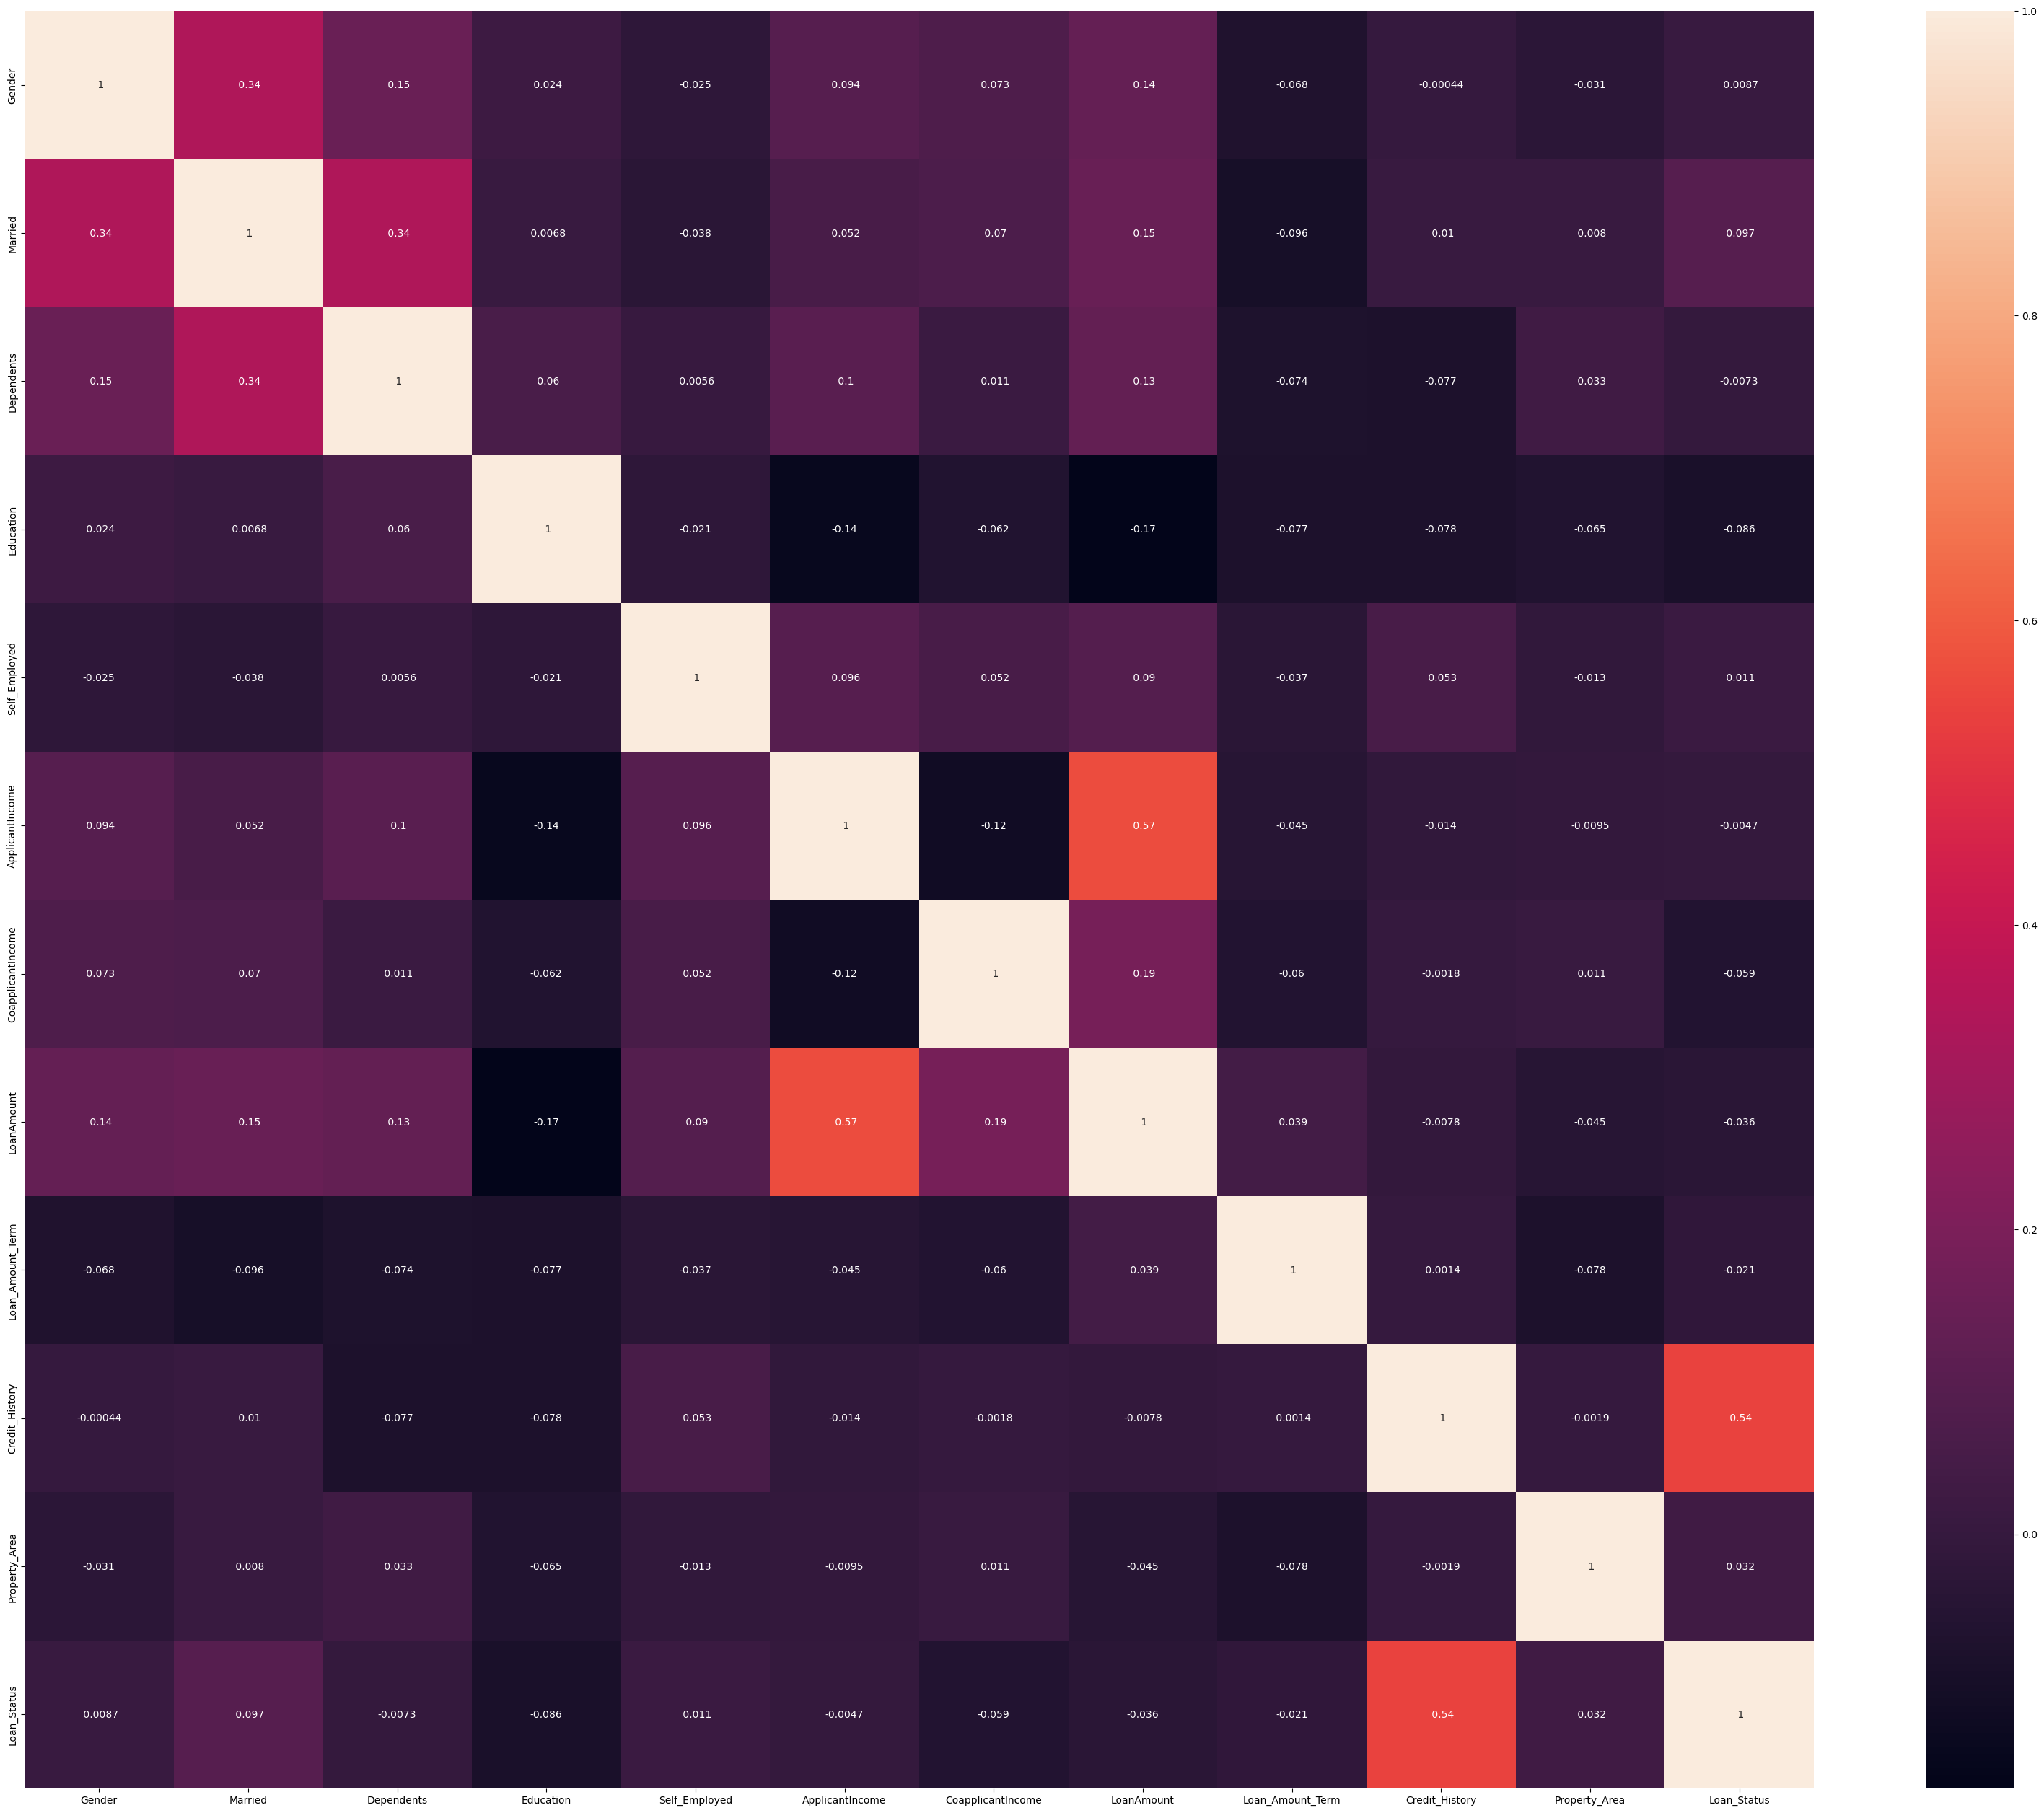

In [31]:
#correlation heatmap
#multicollinearlity
#drop perfectly correlated features(variables)

plt.figure(figsize = (40,32))
sns.heatmap(df.corr(), fmt = ' .2g', annot = True)


## Machine Learning Models

In [44]:
#Separating the data into X and y


X = df.drop('Loan_Status', axis = 1)
y = df['Loan_Status']

In [45]:
#splitting data into training and test

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size = 0.2, random_state = 0)



### Algorithm Selection

In [66]:
pip install xgboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 14.5 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [67]:
from sklearn.metrics import f1_score
# from yellowbrick.classifier import ClassificationReport
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegressionCV, LogisticRegression, SGDClassifier
from sklearn.ensemble import BaggingClassifier, ExtraTreesClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
from xgboost import XGBClassifier

In [68]:
#fixing a random seed for reproducible results

RANDOM_SEED = 42

In [71]:
# defining the classifiers in an array

classifiers = [
    SGDClassifier(max_iter=1000, tol=1e-3, random_state=RANDOM_SEED),
    KNeighborsClassifier(),
    LogisticRegression(solver="lbfgs", random_state=RANDOM_SEED),
    LogisticRegressionCV(cv=3, random_state=RANDOM_SEED),
    BaggingClassifier(random_state=RANDOM_SEED),
    GaussianNB(),
    RandomForestClassifier(n_estimators=100, random_state=RANDOM_SEED),
    ExtraTreesClassifier(n_estimators=100, random_state=RANDOM_SEED),
    DecisionTreeClassifier(class_weight = 'balanced', random_state=RANDOM_SEED),
    XGBClassifier(random_state=RANDOM_SEED)
]


In [72]:
import warnings
warnings.filterwarnings('ignore')

#iterate over the array of classifiers and print their evaluation


for classifier in classifiers:
    classifier.fit(X = X_train, y = y_train)
    y_pred = classifier.predict(X = X_test)
    f1 = f1_score(y_true= y_test, y_pred = y_pred)
    print(classifier.__class__.__name__, ":", f1)

SGDClassifier : 0.8450704225352113
KNeighborsClassifier : 0.7724867724867724
LogisticRegression : 0.8979591836734695
LogisticRegressionCV : 0.8979591836734695
BaggingClassifier : 0.8633879781420764
GaussianNB : 0.8923076923076922
RandomForestClassifier : 0.8645833333333334
ExtraTreesClassifier : 0.8631578947368421
DecisionTreeClassifier : 0.7471264367816092
XGBClassifier : 0.8743169398907102


LogisticRegression Model gives us the highest accuracy among the models for the loan project data. Next:

Next: Confirm accuracy levels with ROC curve to evaluate how this model will generalize to unseen data